In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Add Font Thai

In [ ]:
import matplotlib as mpl
mpl.font_manager.fontManager.addfont("data/EDA_files/thsarabunnew-webfont.ttf")
mpl.rc('font', family="TH Sarabun New", size=10)

In [12]:
ncd = pd.read_csv("data/EDA_files/ncd_screen.csv")

### lab 1  mean

In [15]:
ncd['bslevel'].mean()

104.37630827783063

### lab 2 median

In [ ]:
ncd[["sbp_1","dbp_1"]].median()

### lab 3 Two Variables : Aggregation

In [ ]:
ncd[["bstest","bslevel"]].groupby("bstest",as_index=False).median()

### lab 4 Catogory Data : Unique values (DISTINCT)

In [26]:
hosp = pd.read_csv('data/EDA_files/hospital_info.csv')

In [ ]:
pd.DataFrame(hosp['mname'].unique())

### lab 5 Catagory Data : Frequency value

In [ ]:
h = hosp.groupby("mname", as_index=False).agg({"hospname": pd.Series.nunique})
h

### lab 6 Two variables : Catagory x Catagory (Contingency Table)

In [ ]:
pd.crosstab(hosp["mname"],hosp["haslatlog"])

### lab 7 Two variables : Numerical x Numerical (Correlation)

In [ ]:
new_ncd = ncd.drop(columns=["hospcode", "pid", "seq", "ncd_screen_date_serv", "servplace","smoke","alcohol","dmfamily","htfamily","bstest","screenplace"])

corr = new_ncd.corr()
corr.style.background_gradient(cmap="coolwarm")

### Lab 8 Visualizing Relation (2 Numerical Variables)

In [172]:
x = ncd["sbp_1"]
y = ncd["dbp_1"]

In [ ]:
plt.scatter(x,y, edgecolors ="black")

<Axes: xlabel='sbp_1', ylabel='dbp_1'>

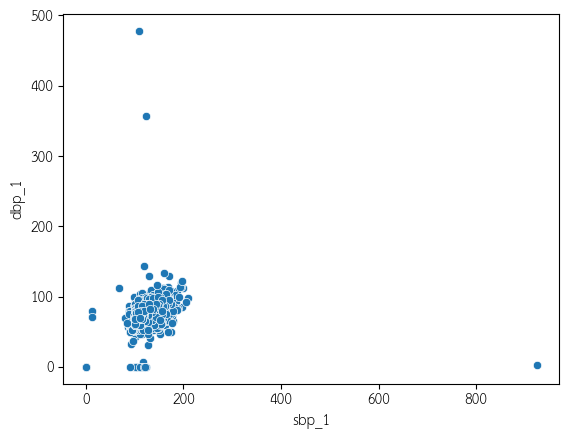

In [173]:
sns.scatterplot(data = ncd, x="sbp_1", y = "dbp_1")

### Lab 9 Visualizine Relation (3 Numerical Variables)

In [170]:
ncd100 =  ncd.head(100)
ncd100

,hospcode,pid,seq,ncd_screen_date_serv,servplace,smoke,alcohol,dmfamily,htfamily,weight,height,waist_cm,sbp_1,dbp_1,sbp_2,dbp_2,bslevel,bstest,screenplace
0,11023,008765,3499362,12/2/2013,1,1.0,1.0,9.0,1.0,55.0,149,88,113,68,110.0,89.0,86.0,3.0,11023
1,11024,017330,1841142,12/16/2015,1,1.0,1.0,2.0,2.0,46.0,154,76,120,60,120.0,60.0,130.0,3.0,11024
2,12418,049945,705117,7/9/2020,1,1.0,1.0,2.0,2.0,52.0,160,74,110,59,110.0,60.0,88.0,3.0,12418
3,12418,055877,693664,9/1/2020,1,1.0,1.0,2.0,2.0,50.0,165,74,100,65,100.0,60.0,85.0,3.0,12418
4,12418,053288,705105,7/9/2020,1,1.0,1.0,2.0,2.0,56.0,160,78,110,63,110.0,63.0,85.0,3.0,12418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,11025,135675,2123434,12/11/2015,1,1.0,1.0,9.0,9.0,80.0,150,86,110,70,110.0,70.0,82.0,3.0,11025
96,11025,135078,2122643,12/11/2015,1,1.0,1.0,9.0,9.0,50.0,160,76,120,80,120.0,80.0,82.0,3.0,11025
97,13910,3610,130906,10/14/2013,2,1.0,1.0,1.0,2.0,72.0,165,80,120,80,120.0,80.0,132.0,3.0,13910
98,21323,071171,1421235,1/11/2021,1,1.0,1.0,2.0,2.0,95.0,167,108,139,87,0.0,0.0,88.0,3.0,21323


In [ ]:
x = ncd100['weight']
y = ncd100['height']
s = ncd100['bslevel']

plt.scatter(x,y, s=s, edgecolor="black", c="orange")

In [ ]:
sns.scatterplot(data = ncd100, x=x,y=y, size=s, sizes= (1,250))

### Lab 10 Visualizine Relation (1 Categorical and 1 Numerical)

In [78]:
ncd5 =  ncd.head(5)

In [ ]:
ax = sns.barplot(ncd5, x='pid', y='bslevel')
ax.bar_label(ax.containers[0])

### Lab 11 2 Categorical and 1 numerical : BAR

In [166]:
dbp = {
  "dbp_1" : ncd5["dbp_1"],
  "dbp_2": ncd5["dbp_2"]
}

In [168]:
new_ncd = pd.melt(ncd5,id_vars=['pid'], value_vars=["dbp_1","dbp_2"])
new_ncd

,pid,variable,value
0,008765,dbp_1,68.0
1,017330,dbp_1,60.0
2,049945,dbp_1,59.0
3,055877,dbp_1,65.0
4,053288,dbp_1,63.0
5,008765,dbp_2,89.0
6,017330,dbp_2,60.0
7,049945,dbp_2,60.0
8,055877,dbp_2,60.0
9,053288,dbp_2,63.0


In [ ]:
ax = sns.barplot(new_ncd, x="pid", y = "value",hue ="variable")

for i in ax.containers: 
  ax.bar_label(i)
plt.show()

### Lab 12 Stacked Bar

In [138]:
ages = pd.read_csv("data/EDA_files/age_structure_2022_boi.csv")
ages

,age,male,female
0,0-14,5454539,5151825
1,15-24,4221749,4023668
2,25-54,14712579,15005961
3,55-64,4136063,4748248
4,65+,3745685,4890158


In [178]:
age_group = ages["age"]
age_group

0     0-14
1    15-24
2    25-54
3    55-64
4      65+
Name: age, dtype: object

In [165]:
sex_counts = {
  "ชาย": ages["male"] /1000000,
  "หญิง" : ages["female"] /1000000
}
sex_counts

{'ชาย': 0     5.454539
 1     4.221749
 2    14.712579
 3     4.136063
 4     3.745685
 Name: male, dtype: float64,
 'หญิง': 0     5.151825
 1     4.023668
 2    15.005961
 3     4.748248
 4     4.890158
 Name: female, dtype: float64}

Add Font thai

In [143]:
import matplotlib as mpl
mpl.font_manager.fontManager.addfont("data/EDA_files/thsarabunnew-webfont.ttf")
mpl.rc('font', family="TH Sarabun New", size=10)

In [ ]:
width = 0.6
fig, ax = plt.subplots()
bottom = np.zeros(len(age_group))

for sex, sex_count in sex_counts.items():
  container = ax.bar(x=age_group, height = sex_count, width=width, label=sex, bottom=bottom)
  bottom += sex_count
  ax.bar_label(container,label_type="center")
ax.set_title("จำนวนประชากรไทย แยกตามกลุ่มอายุ ค.ศ 2022 (หน่วย:ล้านคน)")
ax.legend()

### Lab 13 Stacked bar 100 %

In [ ]:
sum_counts = ages["male"] + ages["female"]
sex_counts = {
  "ชาย": ages["male"] /sum_counts *100,
  "หญิง" : ages["female"] /sum_counts *100
}

In [ ]:
width = 0.6
fig, ax = plt.subplots()
bottom = np.zeros(len(age_group))

for sex, sex_count in sex_counts.items():
  container = ax.bar(x=age_group, height = sex_count, width=width, label=sex, bottom=bottom)
  bottom += sex_count
  ax.bar_label(container,label_type="center")
ax.set_title("จำนวนประชากรไทย แยกตามกลุ่มอายุ ค.ศ 2022 (หน่วย:ล้านคน)")
ax.legend()

### Lab 14 Pie chart

In [176]:
age_group = ages["age"]
sum_counts = ages["male"] + ages["female"]
age_group

0     0-14
1    15-24
2    25-54
3    55-64
4      65+
Name: age, dtype: object

color palatte `Pastel`

In [157]:
colors = sns.color_palette('pastel')[0:5]

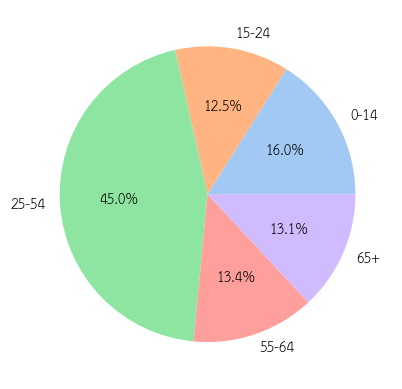

In [177]:
plt.pie(sum_counts, labels = age_group, autopct ="%.1f%%", colors = colors)
plt.show()

### Lab 15 Histogram

In [ ]:
values, bins, bars = plt.hist(ncd["bslevel"], bins = 10)
plt.bar_label(bars)
plt.xticks(bins)

plt.show()

### Lab 16 box plot

In [ ]:
plt.figure(figsize=(10,1))
sns.boxplot(ncd, x="bslevel")
plt.show()